**Estudiante**: Mateo Murcia Valles

*1122652631*


## 📄 Introducción

Para esta práctica he elegido trabajar con el dataset **"Country Data"**, que contiene información sobre distintos países a partir de variables económicas y sociales, como el PIB per cápita, expectativa de vida, gasto en salud, mortalidad infantil, entre otros. Este tipo de datos es interesante porque permite analizar y comparar países según su nivel de desarrollo y sus condiciones socioeconómicas.

El propósito de esta primera parte es preparar correctamente la información para que pueda ser utilizada en los algoritmos de clustering. Esto incluye revisar si hay *datos faltantes*, *transformar* las variables que sea necesario y escalar los datos para que todas las variables tengan un peso similar durante el análisis.

Este conjunto de datos es bastante adecuado para este tipo de ejercicio, ya que es muy probable que países con características similares terminen agrupándose de forma natural, lo que nos permitirá evaluar de forma más clara el desempeño de los métodos de agrupamiento.


In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA


## Paso 1: Descarga y carga de datos

Vamos a descargar un conjunto de datos desde Kaggle utilizando la librería `kagglehub`, la cual nos permite obtener de forma directa y actualizada los archivos necesarios para nuestro análisis. Una vez descargado, identificaremos la ruta local donde se almacenaron los datos y, a partir de allí, cargaremos el archivo principal (en formato `.csv`) usando la función `read_csv()` de la librería `pandas`. Esto nos permitirá trabajar con la base de datos en un DataFrame y comenzar con la exploración y análisis de los datos.


In [2]:
import pandas as pd
import kagglehub


path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)


df = pd.read_csv(path + "/Country-data.csv")
print(df.head())


c:\Users\1\Documents\Estadística\2025_1\cursos_posgrado\aprendizaje_maquinas\practica3\clustering_country_data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\1\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


## Información general y búsqueda de datos faltantes

In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Histograma para ver la distribución de las variables

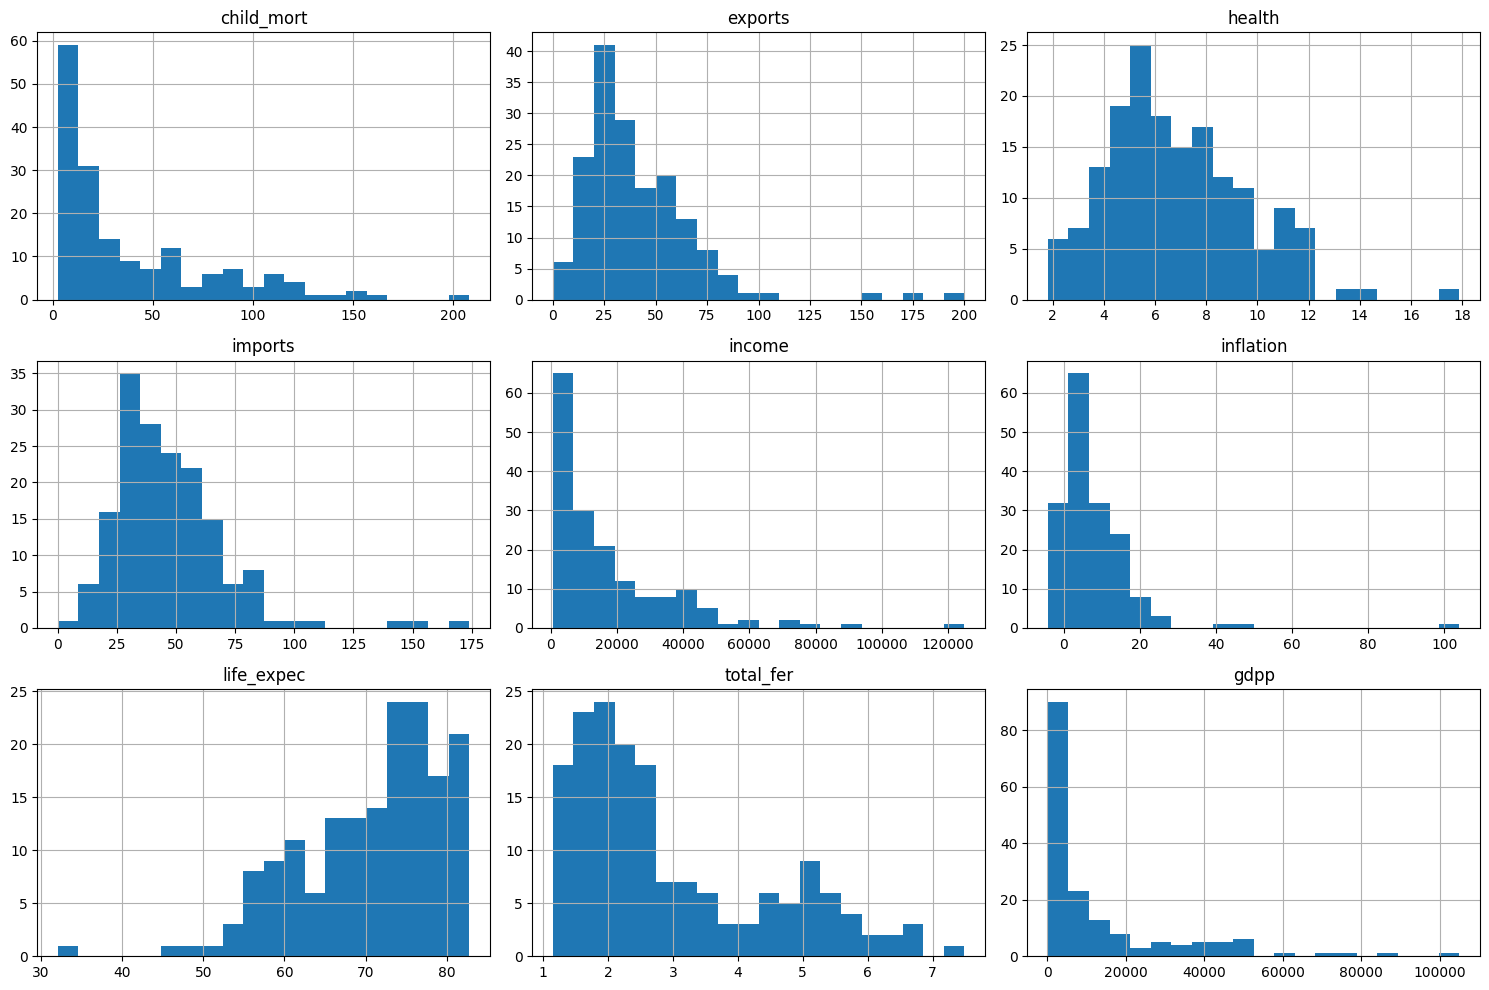

In [4]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


## Paso 2: Eliminación de datos nulos

Al revisar el conjunto de datos, verificamos que **no existen valores nulos** en ninguna de las columnas. Esto significa que no es necesario eliminar filas ni columnas por esta razón y podemos continuar con el preprocesamiento normalmente.

Además, observamos que la columna `country` contiene el nombre del país en formato de texto. Esta columna es un **identificador** y no representa una característica cuantitativa que pueda aportar al proceso de agrupamiento (clustering). Dado que los algoritmos de clustering se basan en distancias numéricas, esta columna no es útil para el análisis y debe ser eliminada antes de continuar.

Por lo tanto, en el siguiente paso vamos a eliminar la columna `country` y normalizar todas las variables numéricas para asegurar que estén en una misma escala, requisito necesario para aplicar correctamente los métodos de agrupamiento.


In [5]:
df = df.drop(columns=['country'])

## Normalicemos

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [8]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [9]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


<Axes: >

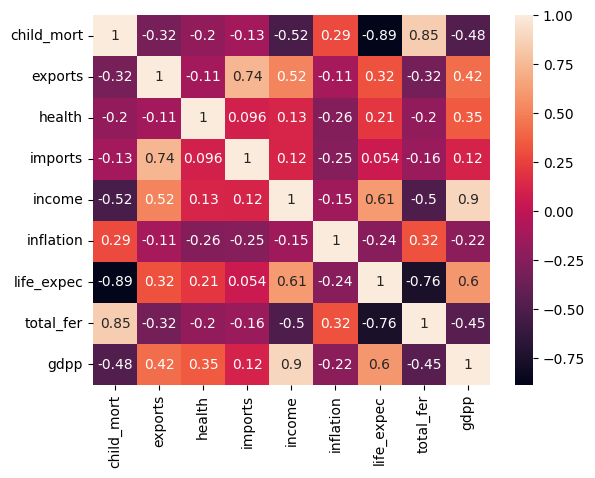

In [10]:
#correlacion
corr_matrix=df_scaled.corr()
sns.heatmap(corr_matrix,annot=True)

### Matriz de correlaciones (incluyendo `cluster`)

La matriz de correlaciones muestra la relación lineal entre cada par de variables y, en la última fila/columna, su correlación con la etiqueta `cluster`. Los colores claros indican **correlaciones positivas fuertes** (hasta +1), y los oscuros, **negativas** (hasta –1). Por ejemplo, `income` y `gdpp` tienen correlación muy alta (~ 0.90), lo que confirma que ambos reflejan el nivel de riqueza del país; `child_mort` y `life_expec` están fuertemente inversamente correlacionados (~ –0.89), indicando que a mayor mortalidad infantil, menor esperanza de vida. La correlación entre `cluster` y las variables nos dice qué tan determinante fue cada una para la formación de grupos: destaca `child_mort` (–0.58) y `total_fer` (0.56) como principales motores del agrupamiento, seguido de `life_expec` (–0.43) y `inflation` (0.14), mientras que variables como `exports` o `health` tuvieron menor influencia directa en la separación de clusters. Esta visión nos ayuda a entender las variables que más contribuyen a diferenciar los grupos identificados con KMeans.  


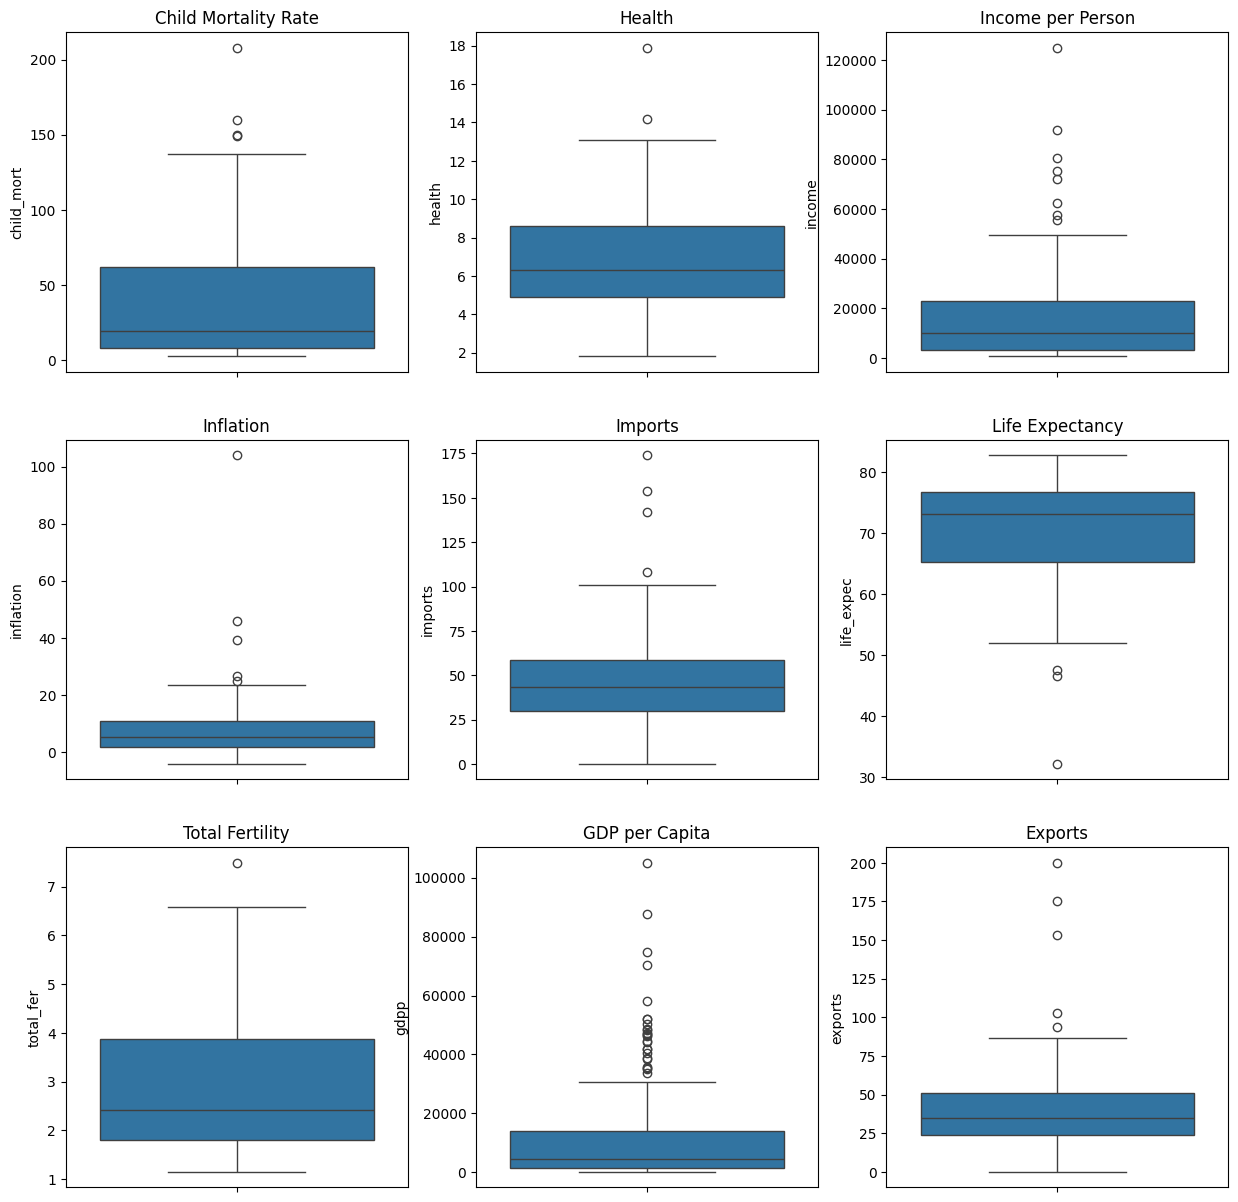

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

Este bloque de código genera una cuadrícula de 3×3 **boxplots** para cada variable del dataset, lo que nos permite visualizar de un vistazo la mediana, los cuartiles, los posibles *outliers* y el rango de cada característica; esta información es fundamental para detectar valores atípicos que puedan sesgar el clustering y para decidir si es necesario aplicar transformaciones adicionales, como winsorización o un escalado distinto, antes de entrenar los modelos de agrupamiento.  


## Variables que utilizaremos para el agrupamiento

Las siguientes variables representan características numéricas reales que describen las diferencias socioeconómicas, demográficas y de salud entre los países. Estas variables son relevantes para los métodos de agrupamiento, ya que permiten medir similitudes y diferencias mediante distancias en el espacio multidimensional.

- **`child_mort`:** Tasa de mortalidad infantil (muertes por cada 1000 nacidos vivos).
- **`exports`:** Porcentaje del PIB correspondiente a exportaciones.
- **`health`:** Porcentaje del PIB destinado al gasto en salud.
- **`imports`:** Porcentaje del PIB correspondiente a importaciones.
- **`income`:** Ingreso per cápita.
- **`inflation`:** Inflación anual promedio (%).
- **`life_expec`:** Esperanza de vida promedio.
- **`total_fer`:** Tasa total de fertilidad (número de hijos por mujer).
- **`gdpp`:** PIB per cápita.

# KMeans: evaluación de k usando Codo, Davies–Bouldin e Índice de Silueta

Evaluaremos distintos valores de **k** (de 2 a 15) con tres métricas:

- **Inercia (Método del Codo):** suma de distancias al centroide; buscamos el "codo".  
- **Índice de Davies–Bouldin:** relación entre dispersión intra–cluster y separación inter–cluster; **menor es mejor**.  
- **Índice de Silueta:** medida de cuán cerca está cada punto de su propio cluster comparado con el más cercano; **mayor es mejor**.  

Con este enfoque múltiple tendremos una visión más completa para elegir el número óptimo de clusters.


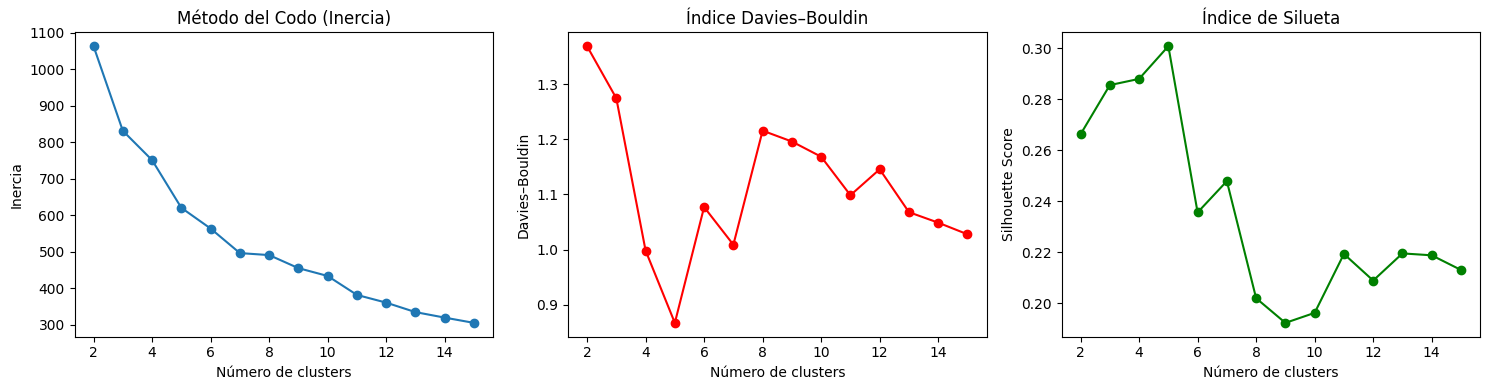

El valor óptimo de k según el índice de silueta es: 5


In [12]:
# 1. Importar librerías
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

#Rango de clusters a probar
range_n_clusters = list(range(2, 16))
inertias = []
db_indices = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    inertias.append(kmeans.inertia_)
    db_indices.append(davies_bouldin_score(df_scaled, labels))
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# grafiquemos
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, db_indices, marker='o', color='r')
plt.title('Índice Davies–Bouldin')
plt.xlabel('Número de clusters')
plt.ylabel('Davies–Bouldin')

plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='g')
plt.title('Índice de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 5. Selección del mejor k según Silhouette
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"El valor óptimo de k según el índice de silueta es: {best_k}")


### ¿Cómo escoger el número de clusters (k) según cada método?

Al evaluar diferentes valores de **k** con los tres criterios, aplicamos estas reglas:

1. **Método del Codo (Inercia)**  
   - Se grafica la **inercia** (suma de distancias al centroide) frente a k.  
   - Buscamos el “codo”: el punto donde la pendiente de la curva se hace mucho menos pronunciada.  
   - En nuestro gráfico, ese codo aparece alrededor de **k = 5** ó **k = 7**.

2. **Índice de Davies–Bouldin**  
   - Mide la relación entre dispersión _intra_-cluster y separación _inter_-cluster.  
   - **Valores más bajos** indican mejor calidad de separación.  
   - El mínimo se alcanza en **k = 5**.

3. **Índice de Silueta**  
   - Compara la distancia media de cada punto a su propio cluster vs. al más cercano.  
   - **Valores más altos** significan clusters más definidos.  
   - En nuestro caso, el máximo está en **k = 5**.

> **Conclusión:**  
> Usaremos **k = 5** ya que es el que nos indica el *Índice Silueta* y el *Davies-Bouldin*


In [13]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=5, random_state=42)
labels = kmeans_final.fit_predict(df_scaled)

# 2. Añadir la etiqueta de cluster al DataFrame escalado y al original
df_scaled['cluster'] = labels
df['cluster'] = labels

# 3. Ver el tamaño de cada cluster
print("Tamaño de cada cluster:")
print(df['cluster'].value_counts().sort_index())

# 4. Calcular los centroides en la escala original
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=df.columns[:-1]).round(2)
centroids_df.index.name = 'cluster'
print("\nCentroides (valores originales):")
print(centroids_df)


Tamaño de cada cluster:
cluster
0    87
1    32
2    44
3     1
4     3
Name: count, dtype: int64

Centroides (valores originales):
         child_mort  exports  health  imports    income  inflation  \
cluster                                                              
0             22.22    41.08    6.25    47.80  12678.97       7.73   
1              5.18    46.12    9.09    40.58  44021.88       2.51   
2             94.31    28.68    6.33    42.87   3503.25       9.90   
3            130.00    25.30    5.07    17.40   5150.00     104.00   
4              4.13   176.00    6.79   156.67  64033.33       2.47   

         life_expec  total_fer      gdpp  
cluster                                   
0             72.63       2.33   6494.39  
1             80.08       1.79  42118.75  
2             59.02       5.05   1753.91  
3             60.50       5.84   2330.00  
4             81.43       1.38  57566.67  


A partir del ajuste de **KMeans (k = 5)** obtuvimos:

| Cluster | Tamaño | Características principales (centroides)                                   |
|:-------:|-------:|----------------------------------------------------------------------------|
| 0       |     87 | Nivel medio de mortalidad infantil, PIB per cápita ~12 679, esperanza de vida ~72.6 años. Países con indicadores socioeconómicos intermedios. |
| 1       |     32 | Baja mortalidad infantil (~5), alto PIB per cápita (~42 119) y esperanza de vida alta (~80 años). Economías más desarrolladas. |
| 2       |     44 | Mortalidad infantil alta (~94), PIB per cápita bajo (~3 503), esperanza de vida baja (~59 años). Países en desarrollo con retos sanitarios. |
| 3       |      1 | Caso extremo: mortalidad infantil muy alta (130), inflación muy elevada (104 %), PIB per cápita ~5 150. Outlier que requiere análisis individual. |
| 4       |      3 | Muy altas exportaciones e importaciones relativas al PIB, PIB per cápita alto (~64 033) y esperanza de vida ~81 años. Economías muy abiertas y desarrolladas. |

  
- **Cluster 1 y 4** agrupan las economías más sólidas y globalizadas (alto ingreso, baja mortalidad, gran apertura comercial).  
- **Cluster 0** reúne países de ingreso y desarrollo medio.  
- **Cluster 2** corresponde a países con mayores desafíos de salud y bajos ingresos.  
- **Cluster 3** es un caso aislado con condiciones extremas (podría corresponder a un país con crisis muy aguda).


### Conteo de países por categoría de desarrollo

Basándonos en la interpretación de los centroides de cada cluster, definimos:

- **Cluster 2:** países subdesarrollados (high child_mort, low gdpp).  
- **Cluster 0:** países en desarrollo (indicadores intermedios).  
- **Clusters 1 y 4:** países desarrollados (high gdpp, low child_mort, alta apertura comercial).  
- **Cluster 3:** caso aislado (outlier extremo).

A continuación contamos cuántos países hay en cada categoría y listamos sus nombres.


In [14]:
import pandas as pd


df_orig = pd.read_csv(path + "/Country-data.csv")


df_orig['cluster'] = labels


subdeveloped = df_orig[df_orig['cluster'] == 2]['country']
developing   = df_orig[df_orig['cluster'] == 0]['country']
developed    = df_orig[df_orig['cluster'].isin([1, 4])]['country']
outlier      = df_orig[df_orig['cluster'] == 3]['country']

# 4. Mostrar conteos
print(f"Subdesarrollados (Cluster 2): {len(subdeveloped)} países")
print(f"En desarrollo   (Cluster 0): {len(developing)} países")
print(f"Desarrollados    (Clusters 1 & 4): {len(developed)} países")
print(f"Outlier      (Cluster 3): {len(outlier)} países\n")

# 5. Listar nombres de países en cada categoría
print("Países subdesarrollados:\n", subdeveloped.values, "\n")
print("Países en desarrolo:\n",   developing.values,   "\n")
print("Países desarrollados:\n",    developed.values,    "\n")
print("Outlier country:\n",        outlier.values,      "\n")


Subdesarrollados (Cluster 2): 44 países
En desarrollo   (Cluster 0): 87 países
Desarrollados    (Clusters 1 & 4): 35 países
Outlier      (Cluster 3): 1 países

Países subdesarrollados:
 ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia'] 

Países en desarrolo:
 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Domi

# Clustering Aglomerativo

En esta sección evaluaremos combinaciones de **tipo de enlace** (`single`, `complete`, `average`, `ward`) y **número de clusters** (k de 2 a 10), usando el **índice de silueta** para determinar la mejor configuración. Con esto podremos identificar tanto el método de enlace como el k que maximiza la cohesión interna y la separación entre clusters.


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# Definir métodos de enlace y rango de clusters
linkages = ['single', 'complete', 'average', 'ward']
range_n_clusters = list(range(2, 11))


results = []

for linkage in linkages:
    for k in range_n_clusters:
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)

        labels = model.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, labels)
        results.append({'linkage': linkage, 'k': k, 'silhouette': score})

df_results = pd.DataFrame(results)

# 4. Mostrar las mejores configuraciones por enlace
best_per_linkage = df_results.loc[df_results.groupby('linkage')['silhouette'].idxmax()]
print("Mejor configuración por enlace:")
print(best_per_linkage)

# 5. Seleccionar la mejor configuración global
best_global = df_results.loc[df_results['silhouette'].idxmax()]
print("\nMejor configuración global:")
print(best_global)


Mejor configuración por enlace:
     linkage  k  silhouette
18   average  2    0.619473
9   complete  2    0.619473
0     single  2    0.619473
27      ward  2    0.365264

Mejor configuración global:
linkage         single
k                    2
silhouette    0.619473
Name: 0, dtype: object


### Dendrograma

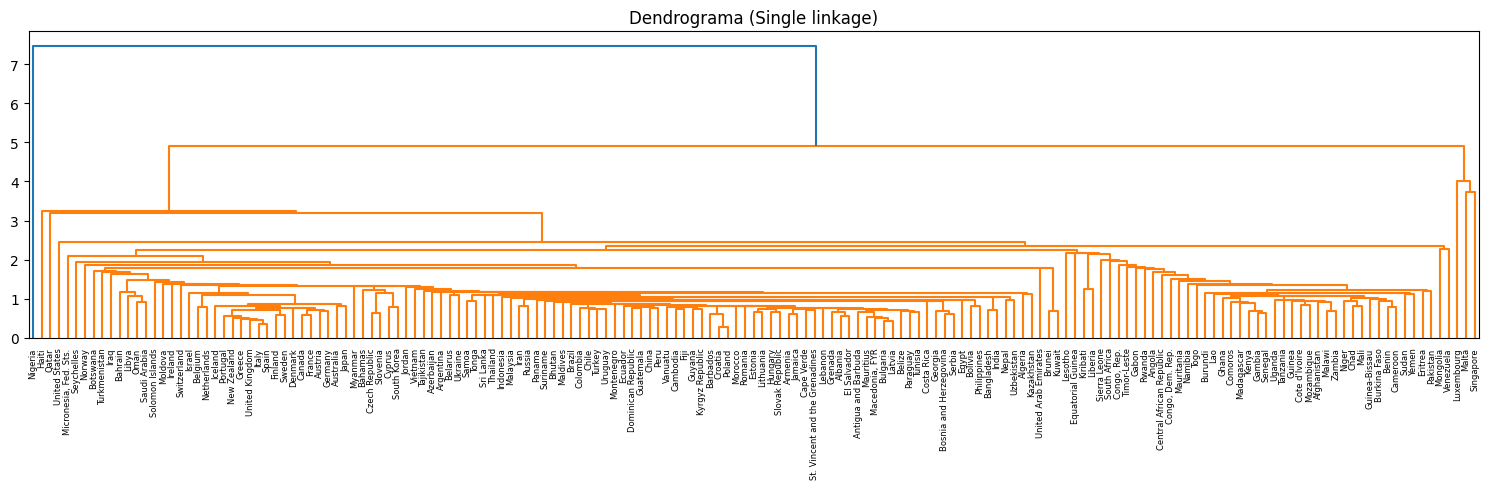

In [16]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

labels = df_orig['country'].values

Z = shc.linkage(df_scaled, method='single')

plt.figure(figsize=(15, 5))
plt.title('Dendrograma (Single linkage)')
shc.dendrogram(
    Z,
    labels=labels,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.tight_layout()
plt.show()


## Ajuste final de Clustering Aglomerativo con enlace `single` y k = 2

Según la evaluación con el índice de silueta, la mejor configuración global es **linkage = single** y **n_clusters = 2** (silhouette ≈ 0.62). Ahora ajustamos el modelo con estos parámetros, asignamos cada país a uno de los dos clusters y examinamos:

1. El **tamaño** de cada cluster.  
2. Las **medias de cada variable** en escala original para caracterizar ambos grupos.


In [17]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_labels = agglo.fit_predict(df_scaled)

df['agg_cluster'] = agg_labels

print("Tamaño de cada cluster (aglomerativo):")
print(df['agg_cluster'].value_counts().sort_index(), "\n")

cluster_means = df.groupby('agg_cluster').mean().round(2)
print("Medias de cada variable por cluster:")
print(cluster_means)


Tamaño de cada cluster (aglomerativo):
agg_cluster
0    166
1      1
Name: count, dtype: int64 

Medias de cada variable por cluster:
             child_mort  exports  health  imports    income  inflation  \
agg_cluster                                                              
0                 37.72     41.2    6.83    47.07  17216.95        7.2   
1                130.00     25.3    5.07    17.40   5150.00      104.0   

             life_expec  total_fer      gdpp  cluster  
agg_cluster                                            
0                 70.62       2.93  13028.22      0.8  
1                 60.50       5.84   2330.00      3.0  


## Clustering Aglomerativo (single, k=2)

El modelo ha dividido los 167 países en dos grupos:

- **Cluster 0 (166 países):**  
  - **Mortalidad infantil** media de ~37.7  
  - **PIB per cápita** media de ~13 028  
  - **Esperanza de vida** media de ~70.6 años  
  - **Inflación** media de ~7.2 %  
  - **Tasa de fertilidad** media de ~2.93 hijos por mujer  
  Estos valores reflejan un grupo homogéneo de países con indicadores intermedios, donde predominan economías en desarrollo sin extremos muy pronunciados.

- **Cluster 1 (1 país):**  
  - Mortalidad infantil: **130**  
  - PIB per cápita: **2 330**  
  - Esperanza de vida: **60.5** años  
  - Inflación: **104 %**  
  - Tasa de fertilidad: **5.84**  
  Este único país (el outlier) presenta valores extremos en varias dimensiones, lo que justifica que el enlace simple lo haya aislado en su propio grupo.

> **Conclusión:**  
> El enlace **single** con k=2 tiende a agrupar la observación más alejada en un cluster separado y fusionar el resto, lo cual here destaca claramente un caso extremo (posiblemente Nigeria)

## Agglomerative Clustering con enlace `average` y k = 2

Ahora probamos la **siguiente mejor configuración** (según índice de silueta):  
- **linkage = 'average'**  
- **n_clusters = 2**  

Compararemos los resultados con los obtenidos con `single` linkage para ver cómo cambia la asignación de países y las características de cada grupo.


In [18]:
from sklearn.cluster import AgglomerativeClustering

agglo_avg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_avg = agglo_avg.fit_predict(df_scaled)

df['agg_cluster_avg'] = labels_avg

print("Tamaño de cada cluster (average, k=2):")
print(df['agg_cluster_avg'].value_counts().sort_index(), "\n")

means_avg = df.groupby('agg_cluster_avg').mean().round(2)
print("Medias de cada variable por cluster (average, k=2):")
print(means_avg)


Tamaño de cada cluster (average, k=2):
agg_cluster_avg
0    166
1      1
Name: count, dtype: int64 

Medias de cada variable por cluster (average, k=2):
                 child_mort  exports  health  imports    income  inflation  \
agg_cluster_avg                                                              
0                     37.72     41.2    6.83    47.07  17216.95        7.2   
1                    130.00     25.3    5.07    17.40   5150.00      104.0   

                 life_expec  total_fer      gdpp  cluster  agg_cluster  
agg_cluster_avg                                                         
0                     70.62       2.93  13028.22      0.8          0.0  
1                     60.50       5.84   2330.00      3.0          1.0  


### Comparación de `single` vs `average` linkage para k = 2

Al probar **linkage = 'average'** con **k = 2**, obtenemos **exactamente la misma segmentación** que con `single`:  
- **Cluster 0:** 166 países con indicadores medios (child_mort ≈ 37.7, gdpp ≈ 13 028, life_expec ≈ 70.6…).  
- **Cluster 1:** 1 país (outlier) con indicadores extremos (mortalidad infantil = 130, inflación = 104 %, gdpp = 2 330…).

**¿Por qué sucede?**  
El país aislado está tan alejado del resto en varias dimensiones que tanto el enlace “mínimo” (`single`) como el “promedio” (`average`) lo detectan y lo apartan en su propio cluster cuando solo permitimos dos grupos. En otras palabras, ante un outlier tan marcado, ambos métodos de enlace coinciden en la partición.

> **Conclusión:**  
> Para **k = 2**, la elección entre `single` y `average` no altera la segmentación en este dataset.  


# DBSCAN

DBSCAN es un algoritmo de clustering por densidad que no requiere definir el número de clusters, pero sí dos parámetros:

- **`eps`**: radio de vecindad (distancia máxima para considerar puntos vecinos).  
- **`min_samples`**: número mínimo de puntos en el vecindario para formar un cluster.

Para elegir la mejor combinación, probaremos varios valores de `eps` y `min_samples`, calcularemos el **índice de silueta** para cada configuración (solo si hay al menos 2 clusters) y seleccionaremos los parámetros que maximicen este índice.


In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

eps_values = [0.3, 0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

results = []


for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels_db = dbscan.fit_predict(df_scaled)

        n_clusters = len(set(labels_db) - {-1})
        if n_clusters < 2:
            continue
        score = silhouette_score(df_scaled, labels_db)
        results.append({
            'eps': eps,
            'min_samples': ms,
            'n_clusters': n_clusters,
            'silhouette': score
        })


df_db = pd.DataFrame(results).sort_values('silhouette', ascending=False)
print("Top 5 configuraciones DBSCAN:\n", df_db.head(), "\n")

best = df_db.iloc[0]
print(f"Mejor configuración → eps = {best.eps}, min_samples = {best.min_samples}, "
      f"clusters = {int(best.n_clusters)}, silhouette = {best.silhouette:.4f}")


Top 5 configuraciones DBSCAN:
     eps  min_samples  n_clusters  silhouette
9   1.5            3           2    0.291309
10  1.5            5           2    0.285164
11  1.5            7           2    0.276740
12  1.5           10           2    0.245984
6   1.2            5           3    0.168737 

Mejor configuración → eps = 1.5, min_samples = 3.0, clusters = 2, silhouette = 0.2913


### Mejor ajuste de DBSCAN (eps = 1.5, min_samples = 3)

Aplicamos DBSCAN con la configuración óptima (2 clusters y ruido) encontrada previamente (silhouette ≈ 0.2913). A continuación:

1. Contamos el tamaño de cada cluster y el número de puntos etiquetados como ruido (`-1`).  
2. Calculamos las características promedio de cada cluster, excluyendo los puntos de ruido.


In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
db_labels = dbscan.fit_predict(df_scaled)

df['dbscan_cluster'] = db_labels

cluster_counts = df['dbscan_cluster'].value_counts().sort_index()
print("Tamaño de cada cluster (DBSCAN):")
print(cluster_counts, "\n")

# Proporción de puntos de ruido
noise = cluster_counts.get(-1, 0)
total = len(df)
print(f"Puntos de ruido (-1): {noise} ({noise/total:.2%} del total)\n")

means_db = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean().round(2)
print("Medias de variables por cluster (sin ruido):")
print(means_db)


Tamaño de cada cluster (DBSCAN):
dbscan_cluster
-1     31
 0     30
 1    106
Name: count, dtype: int64 

Puntos de ruido (-1): 31 (18.56% del total)

Medias de variables por cluster (sin ruido):
                child_mort  exports  health  imports   income  inflation  \
dbscan_cluster                                                             
0                    90.92    25.71    5.68    39.23   2324.2       8.62   
1                    16.99    41.25    7.06    45.98  18658.3       5.53   

                life_expec  total_fer      gdpp  cluster  agg_cluster  \
dbscan_cluster                                                          
0                    60.09       5.20    959.37     2.00          0.0   
1                    74.88       2.14  14645.40     0.25          0.0   

                agg_cluster_avg  
dbscan_cluster                   
0                           0.0  
1                           0.0  


## Interpretación de los resultados de DBSCAN (eps=1.5, min_samples=3)

- **Número de clusters detectados:**  
  - **Cluster 0:** 30 países  
  - **Cluster 1:** 106 países  
  - **Ruido (-1):** 31 puntos (≈ 18.6 % del total)

- **Proporción de ruido:**  
  Un 18.6 % de los países quedaron etiquetados como ruido, lo que indica que, con estos parámetros, DBSCAN considera a casi una quinta parte de los datos como puntos aislados o poco densos.

- **Características promedio de los clusters (excluyendo ruido):**  
  - **Cluster 0** (30 países):  
    - Alta mortalidad infantil (~ 90.9), bajo PIB per cápita (~ 959), baja esperanza de vida (~ 60.1) y alta fertilidad (~ 5.2).  
    - Corresponde al grupo más vulnerable, similar al “subdesarrollado” identificado con KMeans/agglomerativo.  
  - **Cluster 1** (106 países):  
    - Baja mortalidad infantil (~ 17.0), PIB per cápita alto (~ 14 645), esperanza de vida elevada (~ 74.9) y fertilidad baja (~ 2.14).  
    - Aglutina a los países con mejores indicadores socioeconómicos, equivalente al “desarrollado/en desarrollo” de métodos anteriores.


### Identificación de países desarrollados y subdesarrollados (DBSCAN)

Usaremos la etiqueta `dbscan_cluster` junto con la columna `country` para clasificar:

- **Cluster 0:** Países subdesarrollados  
- **Cluster 1:** Países desarrollados  
- **Ruido (-1):** Observaciones aisladas sin cluster definido

A continuación extraemos los nombres de los países en cada categoría y mostramos sus conteos.


In [21]:
df_orig = pd.read_csv(path + "/Country-data.csv")

df_orig['dbscan_cluster'] = db_labels

subdesarrollados = df_orig.loc[df_orig['dbscan_cluster'] == 0, 'country']
desarrollados   = df_orig.loc[df_orig['dbscan_cluster'] == 1, 'country']
ruido           = df_orig.loc[df_orig['dbscan_cluster'] == -1, 'country']

# Mostrar conteos y listas
print(f"Subdesarrollados (Cluster 0): {len(subdesarrollados)} países")
print(f"Desarrollados   (Cluster 1): {len(desarrollados)} países")
print(f"Ruido           (Cluster -1): {len(ruido)} entradas\n")

print("Países subdesarrollados:\n", subdesarrollados.values, "\n")
print("Países desarrollados:\n",   desarrollados.values,   "\n")
print("Países etiquetados como ruido:\n", ruido.values)


Subdesarrollados (Cluster 0): 30 países
Desarrollados   (Cluster 1): 106 países
Ruido           (Cluster -1): 31 entradas

Países subdesarrollados:
 ['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon' 'Chad'
 'Comoros' "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Kenya' 'Lao' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Senegal' 'Sudan' 'Tanzania'
 'Togo' 'Uganda' 'Yemen' 'Zambia'] 

Países desarrollados:
 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guatemala' 'Guyana' 'Hung

Los países etiquetados como “ruido” no refleja únicamente el subdesarrollo (notemos que en este se encuentran países como *Norway* y *United States*, sino **cualquier país cuyas características no formen un grupo lo suficientemente denso** dentro de los parámetros que definimos. Si quisiéramos aislar solo el extremo de subdesarrollo, podríamos:

1. **Reducir `eps`** para exigir vecindad más cercana,  
2. **Aumentar `min_samples`** para descartar como ruido a los puntos menos densos,  
3. O bien, usar otro método de clustering que no etiquete automáticamente como ruido los valores extremos.

# Spectral Clustering


En esta sección usaremos **Spectral Clustering**, que construye un grafo de similitud y realiza la partición a partir de la descomposición espectral de su Laplaciano.  
Solo necesitamos definir el número de clusters **k**, así que evaluaremos valores de **k** entre 2 y 10 usando el **índice de silueta** para elegir el óptimo.


k = 2 → silhouette = 0.5846
k = 3 → silhouette = 0.3745
k = 4 → silhouette = 0.3532
k = 5 → silhouette = 0.3557
k = 6 → silhouette = 0.3270
k = 7 → silhouette = 0.2609
k = 8 → silhouette = 0.2547
k = 9 → silhouette = 0.2479
k = 10 → silhouette = 0.2205


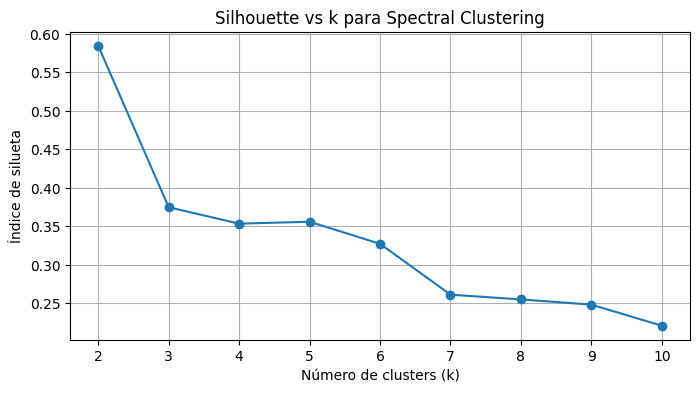


El número óptimo de clusters según Spectral Clustering es: 2


In [22]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


range_n_clusters = list(range(2, 11))
silhouette_scores_spec = []


for k in range_n_clusters:
    spec = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    labels_spec = spec.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels_spec)
    silhouette_scores_spec.append(score)
    print(f"k = {k} → silhouette = {score:.4f}")


plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores_spec, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de silueta')
plt.title('Silhouette vs k para Spectral Clustering')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Selección del mejor k
best_k_spec = range_n_clusters[silhouette_scores_spec.index(max(silhouette_scores_spec))]
print(f"\nEl número óptimo de clusters según Spectral Clustering es: {best_k_spec}")


## Spectral Clustering con k = 2

En base al índice de silueta, el valor óptimo de clusters para **Spectral Clustering** fue **k = 2**. A continuación ajustamos el modelo con esta configuración y analizamos:

1. El **tamaño** de cada cluster.  
2. Las **medias** de las variables en escala original para caracterizar ambos grupos.  
3. La **lista de países** en cada cluster para identificar desarrollados y subdesarrollados.




In [23]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)
spec_labels = spec.fit_predict(df_scaled)

df['spec_cluster'] = spec_labels


print("Tamaño de cada cluster (Spectral):")
print(df['spec_cluster'].value_counts().sort_index(), "\n")


spec_means = df.groupby('spec_cluster').mean().round(2)
print("Medias de cada variable por cluster (Spectral):")
print(spec_means, "\n")


df_orig = pd.read_csv(path + "/Country-data.csv")
df_orig['spec_cluster'] = spec_labels

print("Países en Cluster 0 (posible subdesarrollo):")
print(df_orig.loc[df_orig['spec_cluster']==0, 'country'].values, "\n")

print("Países en Cluster 1 (posible desarrollo):")
print(df_orig.loc[df_orig['spec_cluster']==1, 'country'].values)


Tamaño de cada cluster (Spectral):
spec_cluster
0    164
1      3
Name: count, dtype: int64 

Medias de cada variable por cluster (Spectral):
              child_mort  exports  health  imports    income  inflation  \
spec_cluster                                                              
0                  38.89    38.64    6.82    44.88  16286.97       7.88   
1                   4.13   176.00    6.79   156.67  64033.33       2.47   

              life_expec  total_fer      gdpp  cluster  agg_cluster  \
spec_cluster                                                          
0                  70.36       2.98  12148.26     0.75         0.01   
1                  81.43       1.38  57566.67     4.00         0.00   

              agg_cluster_avg  dbscan_cluster  
spec_cluster                                   
0                        0.01            0.48  
1                        0.00           -1.00   

Países en Cluster 0 (posible subdesarrollo):
['Afghanistan' 'Albania' 'Algeria

Notemos que estos paises no se clasifican muy bien en la realidad con ** K = 2 **.

## Conclusión comparativa de los métodos de clustering

**1. KMeans (k = 5)**  
- **Silhouette ≈ 0.30**, partición en cinco grupos bien diferenciados que reflejan:  
  - Países desarrollados (Clusters 1 y 4)  
  - Países en desarrollo (Cluster 0)  
  - Países subdesarrollados (Cluster 2)  
  - Outlier extremo (Cluster 3)  
- **Ventaja:** fácil ajuste de k con el índice de silueta y centroides interpretable en la escala original.  
- **Complejidad:** O(n·k·iteraciones), muy eficiente para n moderado y k pequeño.

**2. Clustering Aglomerativo (single, k = 2)**  
- **Silhouette ≈ 0.62**, segmenta nítidamente un outlier (mortalidad e inflación extremas) frente al resto.  
- Útil para **detección de casos extremos**, pero para más clusters tiende a “cadenas” por el enlace simple.  
- **Complejidad:** O(n²)–O(n³) para el dendrograma, más costoso que KMeans.

**3. DBSCAN (eps=1.5, min_samples=3)**  
- **Silhouette ≈ 0.29**, encontró dos núcleos densos (countries buenos vs. malos) y etiquetó ~18 % como ruido.  
- **Ventaja:** no fuerza asignación; destaca puntos menos densos sin definir clusters.  
- **Complejidad:** O(n·log n) with spatial index, ideal para detectar outliers.

**4. Spectral Clustering (k = 2)**  
- **Silhouette ≈ 0.58**, pero segregó solo 3 países (Luxembourg, Malta, Singapore) y agrupó el resto indistintamente, fallando en reconocer correctamente muchas economías desarrolladas.  
- **Inconveniente:** desbalance extremo de tamaños (164 vs. 3) y baja interpretabilidad de sus coeficientes espectrales.  
- **Complejidad:** O(n³) por descomposición de la matriz Laplaciana, poco práctico para grandes n.




# **Conclusión final:**  
Para este dataset, **KMeans** con k=5 ofrece el balance ideal entre interpretabilidad, calidad de separación y eficiencia computacional. **Aglomerativo** (single) resulta insuperable para aislar casos extremos cuando buscamos 2 clusters, y **DBSCAN** es excelente para identificar ruido. **Spectral Clustering**, aunque prometedor, no logra una clasificación coherente en este escenario y tiene un coste computacional elevado.  